# Machine Learning Lab Project Report  
**Course:** SWE344  

### **Team Members:**  
- **Mahir Al Shahriar** (2019831077)  
- **Mohammed Tusher Imran Mashrafi** (2019831069)  

---

## Introduction  
### Problem Statement  
This project addresses a critical educational challenge: predicting student academic performance early in their academic journey. The ability to accurately forecast final grades (G3) enables targeted interventions for at-risk students, optimized resource allocation, and personalized learning strategies. This predictive modeling task has significant implications for improving educational outcomes in secondary schools.

### Data Overview  
The dataset represents student achievements from two Portuguese secondary schools, combining performance in Mathematics and Portuguese language subjects. Collected through school reports and questionnaires, it contains:  
- 1044 student records (649 from Portuguese, 395 from Mathematics)  
- 33 attributes covering demographic, social, school-related features  
- Grade components: G1 (first period), G2 (second period), G3 (final grade)  

**Data Source:** UCI Machine Learning Repository  
[Student Performance Dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

## Methodology  
### Overall Approach  
We follow a structured machine learning workflow:  
1. **Data Preprocessing**: Cleaning, transformation, and feature engineering  
2. **Exploratory Analysis**: Understanding distributions and relationships  
3. **Feature Selection**: Identifying predictive features  
4. **Model Development**: Training and tuning multiple algorithms  
5. **Evaluation**: Rigorous validation using multiple metrics  
6. **Deployment Preparation**: Final model selection and testing  

### Prediction Problem Formulation  
- **Target Variable**: Final grade (G3) - continuous numerical value (range 0-20)  
- **Problem Type**: Regression  
- **Evaluation Metrics**:   
  - MAE (Mean Absolute Error): Primary metric for interpretability  
  - MSE (Mean Squared Error): Emphasizes larger errors  
  - RMSE (Root Mean Squared Error): Standard deviation of prediction errors

### Evaluation Metrics and Performance Estimation
Since our target variable is continuous data (G3), this is going to be a regression problem. For this, we are going to use MSE, RMSE and MAE for evaluation metrics. For the performance estimation we will train with 4 different models: linear regression model (lm), SVM, regression trees and random forest. Since the dataset contains more than 500 cases (1044 cases), we will use 10 fold cross validation as the estimation method for internal evaluation. We will use 70:30 holdout for external evaluation.

## Technical Setup  
**Software & Tools:**  
- **Development Environment**: Jupyter Notebook  
- **Programming Language**: Python 3.9+  
- **Key Python Libraries**:  
  - `pandas` (Data manipulation)  
  - `numpy` (Numerical operations)  
  - `scikit-learn` (Machine learning models & evaluation)  
  - `matplotlib` & `seaborn` (Data visualization)  
  - `scipy` (Statistical analysis)  

**Hardware Specifications:**  
- **Machine**: MacBook Air (M1 Chip)  
- **CPU**: Apple M1 (8-core)  
- **RAM**: 16GB Unified Memory  

## Data Pre-processing

### Combining Maths dataset with Portuguese dataset

In [1]:
import pandas as pd

dfm = pd.read_csv("student/student-mat.csv", sep=";")
dfp = pd.read_csv("student/student-por.csv", sep=";")

dfm['subject'] = 'M'
dfp['subject'] = 'P'

df = pd.concat([dfm, dfp], ignore_index=True)
print(f"Total rows: {len(df)}")

Total rows: 1044


### Checking for data quality issues

**Data Types:**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

**Checking for missing values**

In [3]:
print(f"NA values: {df.isna().sum().sum()}")
print(f"Null values: {df.isnull().sum().sum()}")
print(f"Empty strings: {(df == '').sum().sum()}")

NA values: 0
Null values: 0
Empty strings: 0


**Checking for unique values for each column**

In [4]:
for col in df.columns:
    unique_vals = sorted(df[col].unique())
    print(f"{col}: {unique_vals}")

school: ['GP', 'MS']
sex: ['F', 'M']
age: [15, 16, 17, 18, 19, 20, 21, 22]
address: ['R', 'U']
famsize: ['GT3', 'LE3']
Pstatus: ['A', 'T']
Medu: [0, 1, 2, 3, 4]
Fedu: [0, 1, 2, 3, 4]
Mjob: ['at_home', 'health', 'other', 'services', 'teacher']
Fjob: ['at_home', 'health', 'other', 'services', 'teacher']
reason: ['course', 'home', 'other', 'reputation']
guardian: ['father', 'mother', 'other']
traveltime: [1, 2, 3, 4]
studytime: [1, 2, 3, 4]
failures: [0, 1, 2, 3]
schoolsup: ['no', 'yes']
famsup: ['no', 'yes']
paid: ['no', 'yes']
activities: ['no', 'yes']
nursery: ['no', 'yes']
higher: ['no', 'yes']
internet: ['no', 'yes']
romantic: ['no', 'yes']
famrel: [1, 2, 3, 4, 5]
freetime: [1, 2, 3, 4, 5]
goout: [1, 2, 3, 4, 5]
Dalc: [1, 2, 3, 4, 5]
Walc: [1, 2, 3, 4, 5]
health: [1, 2, 3, 4, 5]
absences: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 32, 38, 40, 54, 56, 75]
G1: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

**Conclusion:** There seems to be no missing data, or incorrect data types. Boolean variables like: schoolsup, internet, etc could be changed to 0 and 1, but we are going to keep them like this for now.

## Visualising the Target Distribution
The boxplot shows a few outliers. This suggests that using any of MSE, RMSE and MAE should be fine for our evaluation metrics.

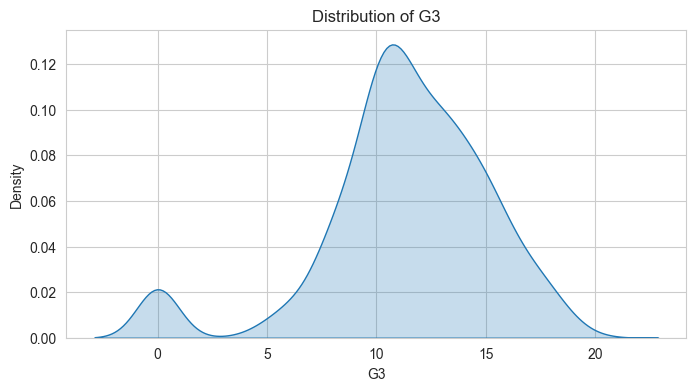

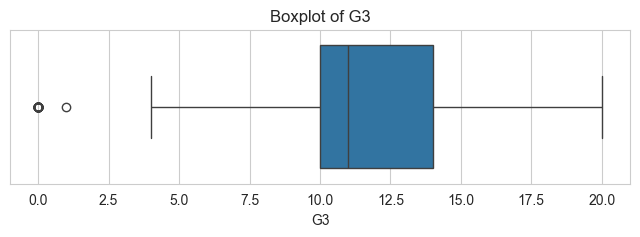

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 4))
sns.kdeplot(df['G3'], fill=True)
plt.title("Distribution of G3")
plt.show()

plt.figure(figsize=(8, 2))
sns.boxplot(x=df['G3'])
plt.title("Boxplot of G3")
plt.show()

## Data Encoding
We transformed our categorical data into labels with label encoding method and one hot encoding to select features to train our svm model.

In [5]:
from sklearn.preprocessing import LabelEncoder

df_lbEnc = df.copy()

label_encoders = {}
for col in df_lbEnc.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_lbEnc[col] = le.fit_transform(df_lbEnc[col])
    label_encoders[col] = le

df_lbEnc.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,0
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,0
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,0


### One Hot Encoding

In [7]:
df_oneHotEnc = df.copy()
df_oneHotEnc = pd.get_dummies(df, drop_first=True)
df_oneHotEnc.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,subject_P
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,True,True,False,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,True,False,False
2,15,1,1,1,2,3,4,3,2,2,...,False,True,False,True,False,True,True,True,False,False
3,15,4,2,1,3,0,3,2,2,1,...,False,False,True,True,True,True,True,True,True,False
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,True,False,True,True,False,False,False


## Feature Selection
We analysed the pearson's correlation of G3 with other features, and picked features with correlation greater than 0.3. We tried it out for both one hot encoding and label encoding and found three features G1, G2 and failures with high correlation to G3.

In [10]:
# Calculate correlations for label encoded data (excluding G3 itself)
corr_lbEnc = df_lbEnc.drop(columns=['G3']).corrwith(df_lbEnc['G3']).abs().sort_values(ascending=False)
print("Label Encoding - Features with |correlation| >= 0.3:")
print(corr_lbEnc[corr_lbEnc >= 0.3])

# Calculate correlations for one-hot encoded data (excluding G3 itself)
corr_oneHotEnc = df_oneHotEnc.drop(columns=['G3']).corrwith(df_oneHotEnc['G3']).abs().sort_values(ascending=False)
print("\nOne-Hot Encoding - Features with |correlation| >= 0.3:")
print(corr_oneHotEnc[corr_oneHotEnc >= 0.3])

Label Encoding - Features with |correlation| >= 0.3:
G2          0.910743
G1          0.809142
failures    0.383145
dtype: float64

One-Hot Encoding - Features with |correlation| >= 0.3:
G2          0.910743
G1          0.809142
failures    0.383145
dtype: float64


This plot shows the correlation of the three features with G3.

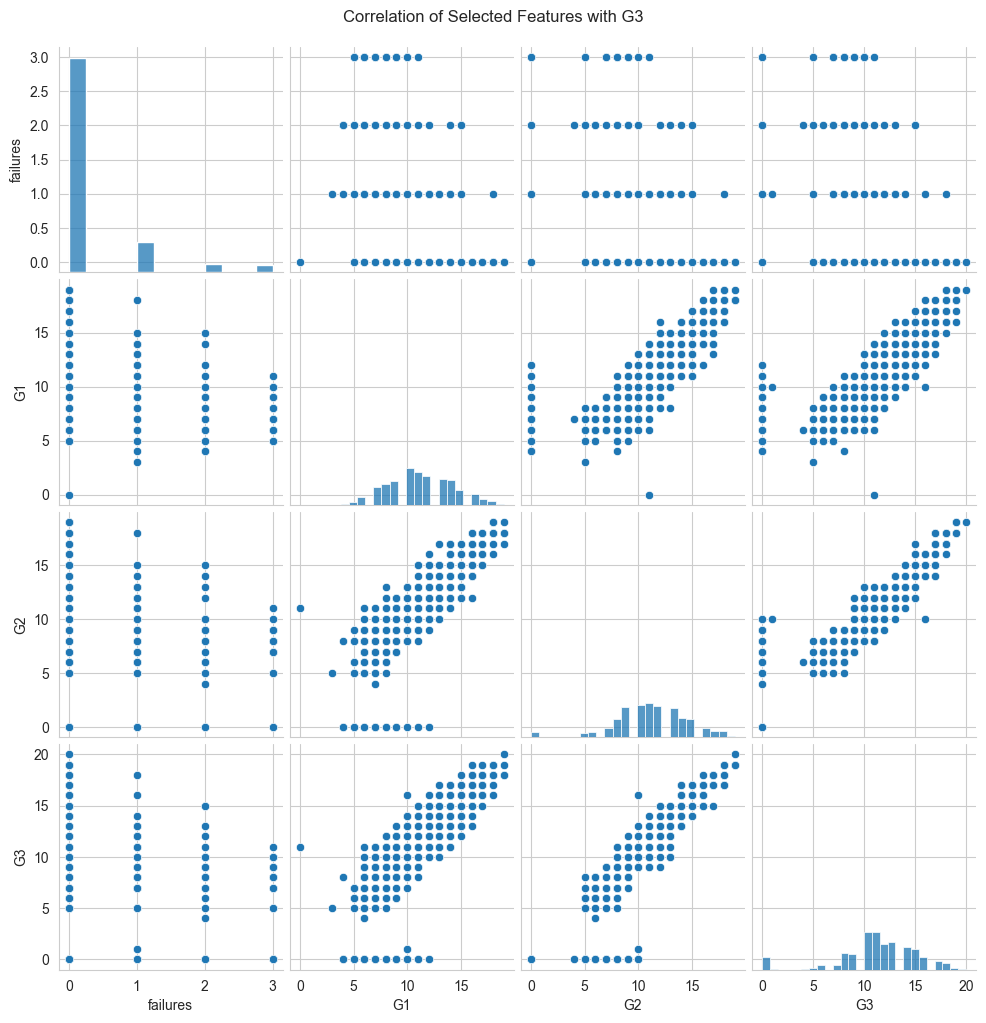

In [13]:
sns.pairplot(df_lbEnc[['failures', 'G1', 'G2', 'G3']])
plt.suptitle("Correlation of Selected Features with G3", y=1.02)
plt.show()

## Filtering out the important features
We select those 3 feature columns (G1, G2, and failures) and scale the feature values.

**Column Filtering**

In [14]:
df_lbEnc_top3corr = df_lbEnc[['failures', 'G1', 'G2', 'G3']]
df_lbEnc_top3corr.head()

,failures,G1,G2,G3
0,0,5,6,6
1,0,5,5,6
2,3,7,8,10
3,0,15,14,15
4,0,6,10,10


**Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler

X = df_lbEnc_top3corr[['failures', 'G1', 'G2']]
y = df_lbEnc_top3corr['G3']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=['failures', 'G1', 'G2'])
df_scaled['G3'] = y.values
df_scaled.head()

,failures,G1,G2,G3
0,-0.403106,-2.083727,-1.597738,6
1,-0.403106,-2.083727,-1.902291,6
2,4.171268,-1.413029,-0.988631,10
3,-0.403106,1.269766,0.838688,15
4,-0.403106,-1.748378,-0.379525,10


## Train test split
We spit out dataset into 70% training and 30% testing.

In [16]:
from sklearn.model_selection import train_test_split

SEED = 1234

X_train, X_test, y_train, y_test = train_test_split(
    df_scaled[['failures', 'G1', 'G2']], 
    df_scaled['G3'], 
    test_size=0.3, 
    random_state=SEED
)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 730
Testing set size: 314


## Internal Evaluation

### Performance Estimation for Internal Evaluation
For our internal evaluation and finding the best parameters we first check how the models perform on the training dataset. We used lm, svm, random forest and decision tree with various hyperparameters. We used MAE, RMSE and MSE for evaluation, 10 fold cross validation with 2 repetitions.


Evaluating LinearRegression...

Evaluating SVR...

Evaluating DecisionTree...

Evaluating RandomForest...

Internal Evaluation Results:

LinearRegression:
  MAE: 0.9483
  MSE: 2.6489
  RMSE: 1.5936

SVR:
  MAE: 0.8890
  MSE: 2.7490
  RMSE: 1.6193
  Best Parameters: {'C': 2, 'gamma': 0.01, 'kernel': 'linear'}

DecisionTree:
  MAE: 0.9968
  MSE: 2.8841
  RMSE: 1.6556
  Best Parameters: {'ccp_alpha': 0.03, 'min_samples_split': 10}

RandomForest:
  MAE: 1.0649
  MSE: 3.2588
  RMSE: 1.7726
  Best Parameters: {'max_features': 3, 'n_estimators': 500}


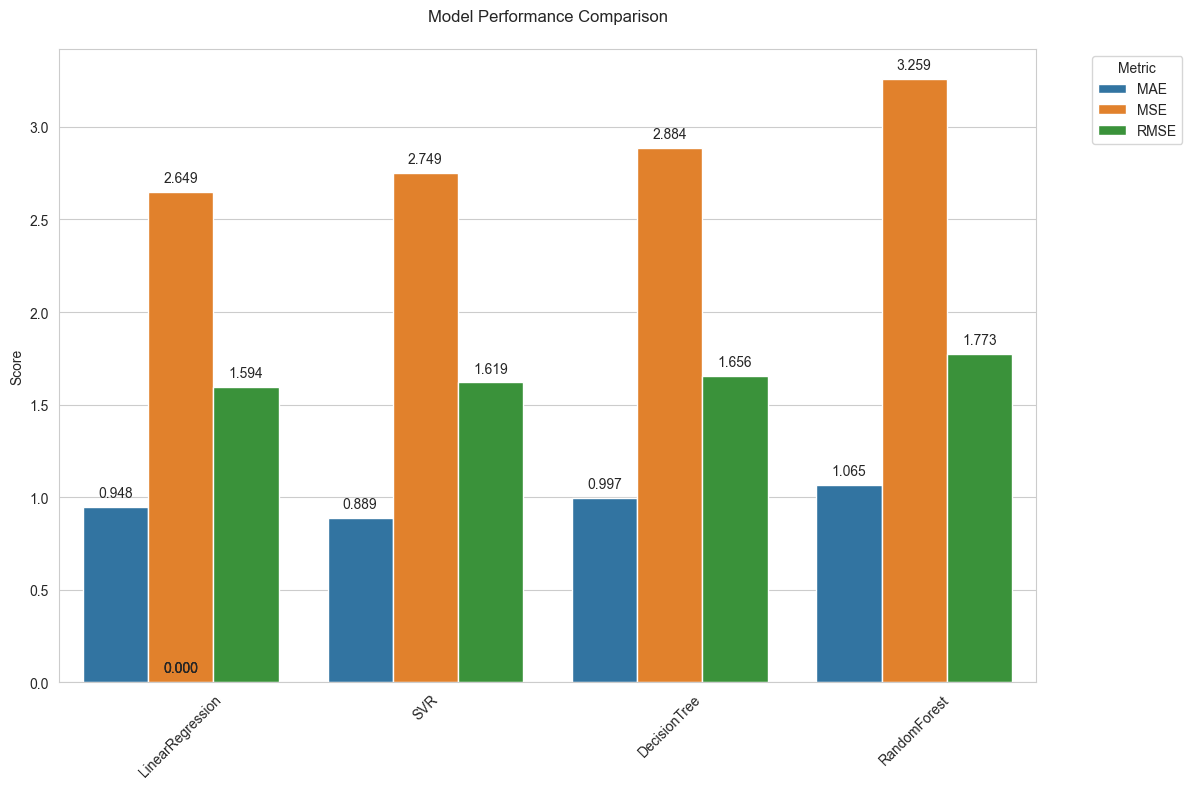

In [17]:
import numpy as np
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [2, 4],
            'gamma': [0.01, 0.02, 0.04],
            'kernel': ['linear', 'poly', 'rbf']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(random_state=SEED),
        'params': {
            'min_samples_split': [10, 50],
            'ccp_alpha': [0.01, 0.03]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=SEED),
        'params': {
            'n_estimators': [250, 500],
            'max_features': [1, 3]
        }
    }
}

scoring = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'rmse': 'neg_root_mean_squared_error'
}

rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=SEED)

results = {}
for name, config in models.items():
    model = config['model']
    param_grid = config['params']
    
    print(f"\nEvaluating {name}...")
    
    if name == 'LinearRegression':
        cv_results = cross_validate(
            model, X_train, y_train, 
            scoring=scoring, 
            cv=rkf,
            return_train_score=False
        )
        results[name] = {
            'mae': -np.mean(cv_results['test_mae']),
            'mse': -np.mean(cv_results['test_mse']),
            'rmse': -np.mean(cv_results['test_rmse'])
        }
    else:
        from sklearn.model_selection import GridSearchCV
        
        grid = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring=scoring,
            refit='mae',
            cv=rkf,
            return_train_score=False
        )
        grid.fit(X_train, y_train)
        
        results[name] = {
            'mae': -grid.best_score_,
            'mse': -grid.cv_results_['mean_test_mse'][grid.best_index_],
            'rmse': -grid.cv_results_['mean_test_rmse'][grid.best_index_],
            'best_params': grid.best_params_
        }

print("\nInternal Evaluation Results:")
for model, scores in results.items():
    print(f"\n{model}:")
    for metric, value in scores.items():
        if metric != 'best_params':
            print(f"  {metric.upper()}: {value:.4f}")
        else:
            print(f"  Best Parameters: {value}")


# Alternative more sophisticated visualization
plt.figure(figsize=(12, 8))

# Prepare data in long format for seaborn
plot_data = []
for model in results:
    for metric in ['mae', 'mse', 'rmse']:
        plot_data.append({
            'Model': model,
            'Metric': metric.upper(),
            'Score': results[model][metric]
        })
plot_df = pd.DataFrame(plot_data)

# Create plot
sns.set_style("whitegrid")
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=plot_df, palette='tab10')

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

# Customize plot
plt.title('Model Performance Comparison', pad=20)
plt.xlabel('')
plt.ylabel('Score')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top Performer for Internal Evaluation
Our top performer for the internal evaluation was the linear regression model (lm) for all the three evaluation metrics.

In [18]:
best_model = min(results, key=lambda x: results[x]['rmse'])
print(f"Top performer: {best_model} with RMSE: {results[best_model]['rmse']:.4f}")

Top performer: LinearRegression with RMSE: 1.5936


## External Evaluation
We finally train and test our linear regression model.

In [19]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error

y_pred = final_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae_test:.4f}")

Test MAE: 0.8861


The graph shows the relation between the predicted G3 and actual G3 for test data.

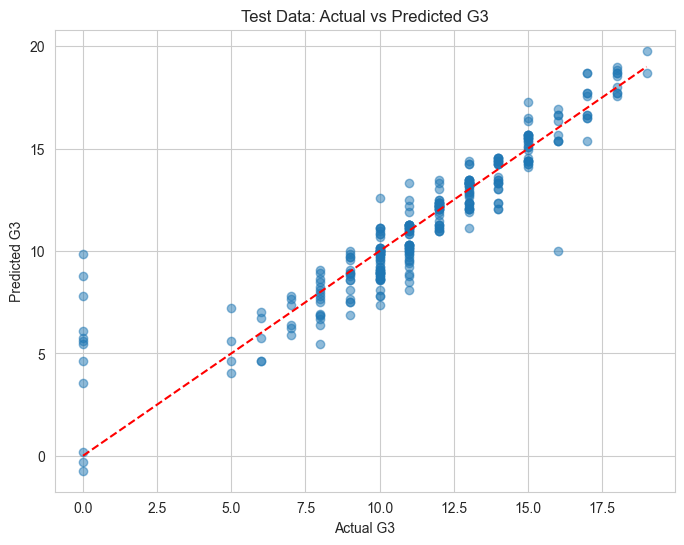

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Test Data: Actual vs Predicted G3')
plt.show()

# Conclusion  

In conclusion, our **linear regression model** demonstrates strong accuracy in predicting a student's `G3` grade when provided with `G1`, `G2`, and `failure` data.  

### Key Findings:  
- **MAE (Mean Absolute Error):**  
  - Train: **0.9483**  
  - Test: **0.8861**  
- Since `G3` ranges from **0 to 20**, an error of **~0.9** is negligible.  
- Consistent performance across train/test sets suggests **no overfitting or underfitting**.  


### Final Thoughts:  
- Linear regression provides the best **balance of simplicity and accuracy** for this task.  
- Alternative models (e.g., SVR) could improve with **more data or feature engineering**.  
- Future work: Test robustness on larger datasets or with additional features.  
